# House Price Prediction(multi_var) 21MID0016

## Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

## Reading the dataset

In [26]:
df=pd.read_csv("multi_var.csv")

In [27]:
df

,area,bedroom,age,price
0,2600,3.0,20,5500
1,3000,4.0,15,5650
2,3200,NaN,18,6100
3,3600,3.0,30,5950
4,4000,5.0,8,7600


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   area     5 non-null      int64  
 1   bedroom  4 non-null      float64
 2   age      5 non-null      int64  
 3   price    5 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 292.0 bytes


Text(0.5, 1.0, 'House_price_prediction')

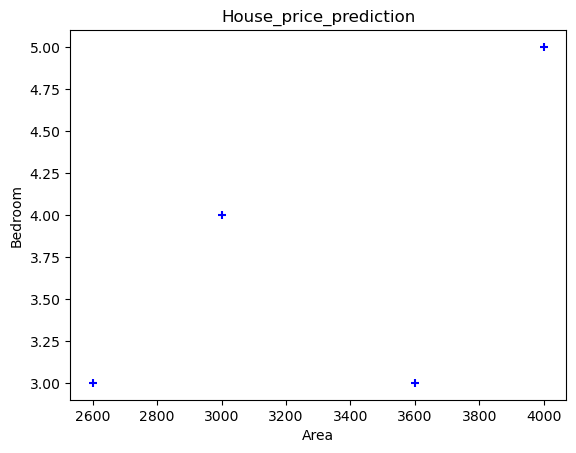

In [29]:
# Visualization before updating the value
plt.scatter(df.area,df.bedroom,color="blue",marker="+")
plt.xlabel("Area")
plt.ylabel("Bedroom")
plt.title("House_price_prediction")

## Data Wrangling

In [30]:
df.isnull()

,area,bedroom,age,price
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False


In [31]:
df.isnull().sum()

area       0
bedroom    1
age        0
price      0
dtype: int64

In [32]:
df.bedroom.median()

3.5

In [33]:
import math
median_bedroom=math.floor(df.bedroom.median())
median_bedroom

3

In [34]:
df.fillna(median_bedroom)

,area,bedroom,age,price
0,2600,3.0,20,5500
1,3000,4.0,15,5650
2,3200,3.0,18,6100
3,3600,3.0,30,5950
4,4000,5.0,8,7600


In [35]:
df.bedroom=df.bedroom.fillna(median_bedroom)

In [36]:
df

,area,bedroom,age,price
0,2600,3.0,20,5500
1,3000,4.0,15,5650
2,3200,3.0,18,6100
3,3600,3.0,30,5950
4,4000,5.0,8,7600


In [37]:
df.isnull().sum()

area       0
bedroom    0
age        0
price      0
dtype: int64

## Data Visualizing

Text(0.5, 1.0, 'House_price_prediction')

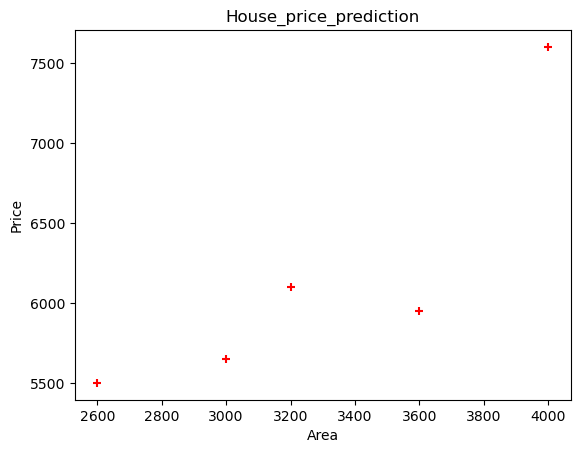

In [38]:
plt.scatter(df.area,df.price,color="red",marker="+")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("House_price_prediction")

Text(0.5, 1.0, 'House_price_prediction')

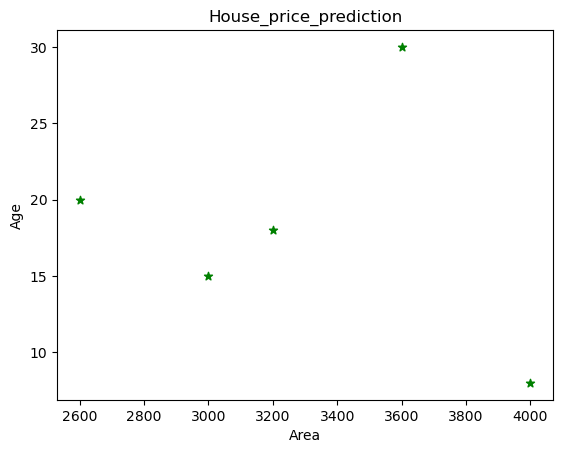

In [39]:
plt.scatter(df.area,df.age,color="green",marker="*")
plt.xlabel("Area")
plt.ylabel("Age")
plt.title("House_price_prediction")

Text(0.5, 1.0, 'House_price_prediction')

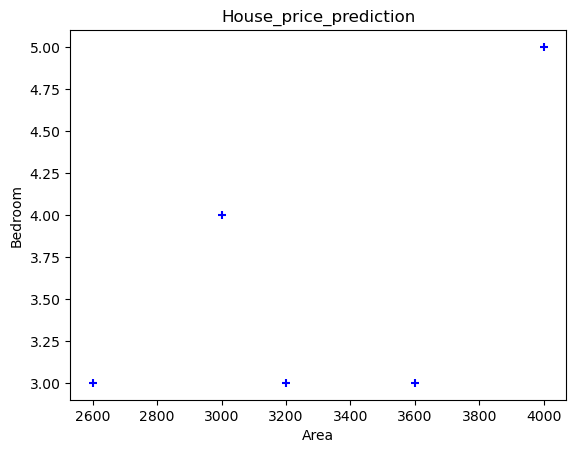

In [40]:
plt.scatter(df.area,df.bedroom,color="blue",marker="+")
plt.xlabel("Area")
plt.ylabel("Bedroom")
plt.title("House_price_prediction")

## Train the model

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression()

In [43]:
reg.fit(df[['area','bedroom','age']],df.price)

LinearRegression()

## Predicting

In [44]:
reg.predict([[3000,3,40]])

C:\Users\Richa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4444.])

In [45]:
reg.coef_

array([   1.3725, -260.25  ,  -68.25  ])

In [46]:
reg.intercept_

3837.25

## Check the Accuracy Score

In [47]:
x=df[['area','bedroom','age']]
y=df.price

In [48]:
reg.score(x,y)*100

94.88817891373802